<a href="https://colab.research.google.com/github/yasminghd/2022_ML_Earth_Env_Sci/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Downloading the data and then, unzipping the .zip file.

In [29]:
#!wget http://madm.dfki.de/files/sentinel/EuroSAT.zip \
#      -O EuroSAT.zip

In [30]:
#! unzip EuroSAT.zip

Importing the necessary packages.

In [31]:
import os
import matplotlib.pyplot as plt
import PIL
import numpy as np
import pandas as pd
from tqdm import tqdm
import shutil

Printing all the labels.

In [32]:
DATASET = "./input/2750"

LABELS = os.listdir(DATASET)
print(LABELS)

['HerbaceousVegetation', 'Highway', 'AnnualCrop', 'Industrial', 'SeaLake', 'Residential', 'Forest', 'PermanentCrop', 'Pasture', 'River']


Plotting sample images from each different class.

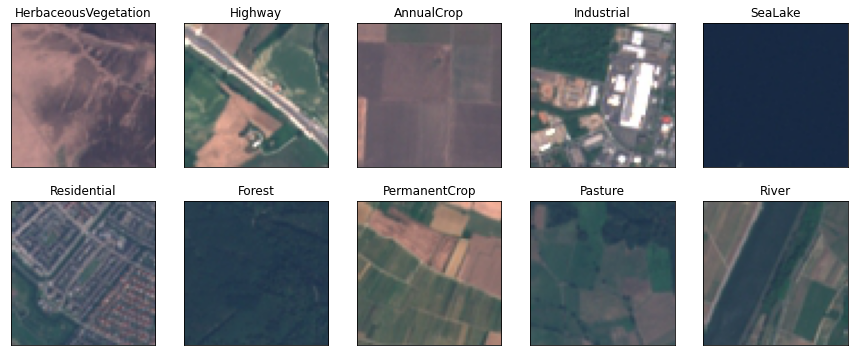

In [33]:
img_paths = [os.path.join(DATASET, l, l+'_1.jpg') for l in LABELS]

def plot_sat_imgs(paths):
    plt.figure(figsize=(15, 6))
    for i in range(10):
        plt.subplot(2, 5, i+1, xticks=[], yticks=[])
        img = PIL.Image.open(paths[i], 'r')
        plt.imshow(np.asarray(img))
        plt.title(paths[i].split('/')[-2])

plot_sat_imgs(img_paths)

Plot class distributions of whole dataset

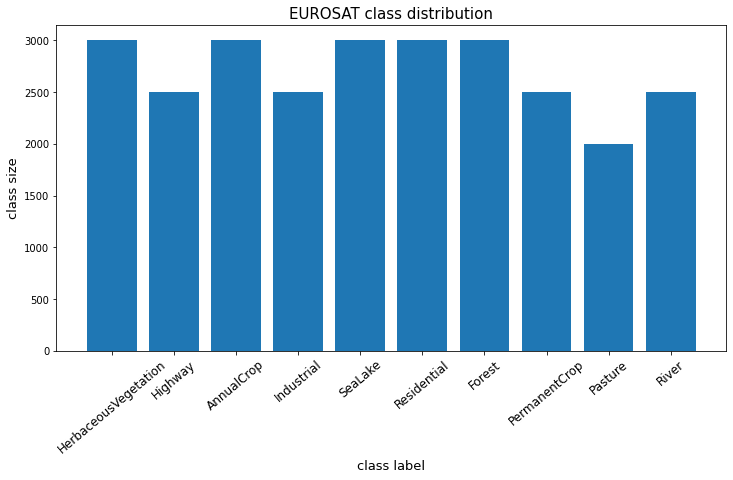

In [34]:
counts = {}

for l in LABELS:
    counts[l] = len(os.listdir(os.path.join(DATASET, l)))

    
plt.figure(figsize=(12, 6))

plt.bar(range(len(counts)), list(counts.values()), align='center')
plt.xticks(range(len(counts)), list(counts.keys()), fontsize=12, rotation=40)
plt.xlabel('class label', fontsize=13)
plt.ylabel('class size', fontsize=13)
plt.title('EUROSAT class distribution', fontsize=15);

In [35]:
def load_img_from_folder(folder):
    images = []
    counter = 0
    for filename in os.listdir(folder):
      img = plt.imread(os.path.join(folder,filename))
      images.append(img)
      counter = counter + 1
    return images

In [36]:
image_label = []
images = []

for i in range(0, len(LABELS)):
  folder_path = DATASET + '/' + LABELS[i]
  img = load_img_from_folder(folder_path)
  images.extend(img)
  img_shp = np.shape(img)
  lbl = (i+1)*np.ones(img_shp[0])
  image_label.extend(lbl)
  #print(i)

In [37]:
images_array = np.asarray(images)/255
labels_array = np.asarray(image_label)

In [45]:
img_shop = np.shape(images_array)
flatx = np.reshape(images_array, (img_shop[0],64*64,3))

In [46]:
from sklearn.model_selection import StratifiedShuffleSplit

tts = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for t_index, test_index in tts.split(flatx, labels_array):
    X_t, X_test = flatx[t_index], flatx[test_index]
    y_t, y_test = labels_array[t_index], labels_array[test_index]

In [47]:
tvs = StratifiedShuffleSplit(n_splits=1, test_size=0.16, random_state=42)

for train_index, valid_index in tvs.split(X_t, y_t):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_valid = X_t[train_index], X_t[valid_index]
    y_train, y_valid = y_t[train_index], y_t[valid_index]

Text(0.5, 1.0, "Histogram with 'auto' bins")

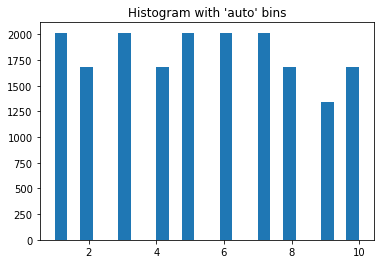

In [48]:
import matplotlib.pyplot as plt
rng = np.random.RandomState()  # deterministic random data

np.histogram(y_train)

plt.hist(y_train, bins='auto')  # arguments are passed to np.histogram
plt.title("Histogram with 'auto' bins")

In [49]:
print(np.shape(X_train), np.shape(X_valid), np.shape(X_test))

(18144, 4096, 3) (3456, 4096, 3) (5400, 4096, 3)


In [50]:
unique_train, counts_train = np.unique(y_train, return_counts=True)
unique_valid, counts_valid = np.unique(y_valid, return_counts=True)
unique_test, counts_test  = np.unique(y_test , return_counts=True)

print(np.asarray((unique_train, counts_train/len(y_train)*100)).T)
print(np.asarray((unique_valid, counts_valid/len(y_valid)*100)).T)
print(np.asarray((unique_test , counts_test/len(y_test)*100)).T)

[[ 1.         11.11111111]
 [ 2.          9.25925926]
 [ 3.         11.11111111]
 [ 4.          9.25925926]
 [ 5.         11.11111111]
 [ 6.         11.11111111]
 [ 7.         11.11111111]
 [ 8.          9.25925926]
 [ 9.          7.40740741]
 [10.          9.25925926]]
[[ 1.         11.11111111]
 [ 2.          9.25925926]
 [ 3.         11.11111111]
 [ 4.          9.25925926]
 [ 5.         11.11111111]
 [ 6.         11.11111111]
 [ 7.         11.11111111]
 [ 8.          9.25925926]
 [ 9.          7.40740741]
 [10.          9.25925926]]
[[ 1.         11.11111111]
 [ 2.          9.25925926]
 [ 3.         11.11111111]
 [ 4.          9.25925926]
 [ 5.         11.11111111]
 [ 6.         11.11111111]
 [ 7.         11.11111111]
 [ 8.          9.25925926]
 [ 9.          7.40740741]
 [10.          9.25925926]]


In [52]:
# import random forest classifier
from sklearn import ensemble
from sklearn.metrics import accuracy_score


rf_clf = ensemble.RandomForestClassifier(n_estimators=20, n_jobs=-1, random_state=7)
rf_clf.fit(X_train, y_train)
y_pred = rf_clf.predict(X_test)
acc = accuracy_score(y_pred, y_test)
print("Accuracy Score: {0:.4}".format(acc))

ValueError: ignored

create training and testing directories create class label subdirectories in train and test

In [32]:
import re
from keras.preprocessing.image import ImageDataGenerator

TRAIN_DIR = '../working/training'
TEST_DIR = '../working/testing'
BATCH_SIZE = 64
NUM_CLASSES=len(LABELS)
INPUT_SHAPE = (64, 64, 3)
CLASS_MODE = 'categorical'

# create training and testing directories
for path in (TRAIN_DIR, TEST_DIR):
    if not os.path.exists(path):
        os.makedirs(path)


# create class label subdirectories in train and test
for l in LABELS:
    
    if not os.path.exists(os.path.join(TRAIN_DIR, l)):
        os.mkdir(os.path.join(TRAIN_DIR, l))

    if not os.path.exists(os.path.join(TEST_DIR, l)):
        os.mkdir(os.path.join(TEST_DIR, l))

In [33]:
# map each image path to their class label in 'data'
data = {}

for l in LABELS:
    for img in os.listdir(DATASET+'/'+l):
        data.update({os.path.join(DATASET, l, img): l})

X = pd.Series(list(data.keys()))
y = pd.get_dummies(pd.Series(data.values()))

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=69)

# split the list of image paths
for train_idx, test_idx in split.split(X, y):
    
    train_paths = X[train_idx]
    test_paths = X[test_idx]

    # define a new path for each image depending on training or testing
    new_train_paths = [re.sub('\.\/input\/2750', '../working/training', i) for i in train_paths]
    new_test_paths = [re.sub('\.\/input\/2750', '../working/testing', i) for i in test_paths]

    train_path_map = list((zip(train_paths, new_train_paths)))
    test_path_map = list((zip(test_paths, new_test_paths)))
        # move the files
    print("moving training files..")
    for i in tqdm(train_path_map):
        if not os.path.exists(i[1]):
            if not os.path.exists(re.sub('training', 'testing', i[1])):
                shutil.copy(i[0], i[1])
    
    print("moving testing files..")
    for i in tqdm(test_path_map):
        if not os.path.exists(i[1]):
            if not os.path.exists(re.sub('training', 'testing', i[1])):
                shutil.copy(i[0], i[1])

moving training files..


100%|██████████| 21600/21600 [00:00<00:00, 91973.81it/s]


moving testing files..


100%|██████████| 5400/5400 [00:00<00:00, 62880.33it/s]


In [34]:
# Create a ImageDataGenerator Instance which can be used for data augmentation

train_gen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=60,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip = True
#   validation_split=0.2
)

train_generator = train_gen.flow_from_directory(
    directory=TRAIN_DIR,
    target_size=(64, 64),
    batch_size=BATCH_SIZE,
    class_mode=CLASS_MODE,
    #subset='training',
    color_mode='rgb',
    shuffle=True,
    seed=69
)
# The validation set is optional if we choose to do that
"""
valid_generator = train_gen.flow_from_directory(
    directory=TRAIN_DIR,
    target_size=(64, 64),
        batch_size=BATCH_SIZE,
    class_mode=CLASS_MODE,
    subset='validation',    
    color_mode='rgb',
    shuffle=True,
    seed=69
)
"""
# test generator for evaluation purposes with no augmentations, just rescaling
test_gen = ImageDataGenerator(
    rescale=1./255,
)

test_generator = test_gen.flow_from_directory(
    directory=TEST_DIR,
    target_size=(64, 64),
    batch_size=BATCH_SIZE,
    class_mode=CLASS_MODE,
    color_mode='rgb',
    shuffle=False,
    seed=69
)

Found 21600 images belonging to 10 classes.
Found 5400 images belonging to 10 classes.


In [35]:
print(train_generator.class_indices)

{'AnnualCrop': 0, 'Forest': 1, 'HerbaceousVegetation': 2, 'Highway': 3, 'Industrial': 4, 'Pasture': 5, 'PermanentCrop': 6, 'Residential': 7, 'River': 8, 'SeaLake': 9}


In [36]:
np.save('class_indices', train_generator.class_indices)

In [37]:
# Using image data generator api in keras for making image dataset 
rf_gen = ImageDataGenerator(rescale=1./255)

rf_train_generator = rf_gen.flow_from_directory(
    directory=TRAIN_DIR,
    target_size=(64, 64),
    # by using batch_size as training data size we can extract data from this iterator
    batch_size=21600, 
    class_mode=CLASS_MODE,
    color_mode='rgb',
    shuffle=False,
    seed=7
)

rf_test_generator = rf_gen.flow_from_directory(
    directory=TEST_DIR,
    target_size=(64, 64),
    batch_size=5400,
    class_mode=CLASS_MODE,
    color_mode='rgb',
    shuffle=False,
    seed=7
)

Found 21600 images belonging to 10 classes.
Found 5400 images belonging to 10 classes.


In [38]:
train = rf_train_generator.next()
X_train = train[0].reshape(21600, 12288)
y_train = train[1]

test = rf_test_generator.next()
X_test = test[0].reshape(5400, 12288)
y_test = test[1]

In [41]:
# Creating mini batches of training data as training on whole data is difficult
ids_1 = np.random.choice(len(X_train), size=21600, replace=False)
X_train_mini_1 = X_train[ids_1]
y_train_mini_1 = rf_train_generator.classes[ids_1]

In [52]:
np.shape(y_train)

(21600, 10)

In [ ]:
# import random forest classifier
from sklearn import ensemble
from sklearn.metrics import accuracy_score


rf_clf = ensemble.RandomForestClassifier(n_estimators=20, n_jobs=-1, random_state=7)
rf_clf.fit(X_train_mini_1, y_train_mini_1)
y_pred = rf_clf.predict(X_test)
acc = accuracy_score(y_pred, rf_test_generator.classes)
print("Accuracy Score: {0:.4}".format(acc))

In [ ]:
import tensorflow as tf
from keras.models import Model
from keras.layers import Dense, Dropout, Flatten
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.optimizers import Adam

In [ ]:
# Note that for different CNN models we are using different setup of dense layers
def compile_model(cnn_base, input_shape, n_classes, optimizer, fine_tune=None):
    
    if (cnn_base == 'ResNet50') or (cnn_base == 'ResNet50V2') or (cnn_base == 'ResNet152V2'):
        if cnn_base == 'ResNet50':
            conv_base = ResNet50(include_top=False,
                                 weights='imagenet', 
                                 input_shape=input_shape)
        elif cnn_base == 'ResNet50V2':
            conv_base = ResNet50V2(include_top=False,
                                 weights='imagenet', 
                                 input_shape=input_shape)
        else:
            conv_base = ResNet152V2(include_top=False,
                                 weights='imagenet', 
                                 input_shape=input_shape)
        top_model = conv_base.output
        top_model = Flatten()(top_model)
        top_model = Dense(2048, activation='relu')(top_model)
        top_model = Dropout(0.2)(top_model)
       
    
    elif (cnn_base == 'VGG16') or (cnn_base == 'VGG19'):
        if cnn_base == 'VGG16':
            conv_base = VGG16(include_top=False,
                              weights='imagenet', 
                              input_shape=input_shape)
        else:
            conv_base = VGG19(include_top=False,
                              weights='imagenet', 
                              input_shape=input_shape)
        top_model = conv_base.output
        top_model = Flatten()(top_model)
        top_model = Dense(2048, activation='relu')(top_model)
        top_model = Dropout(0.2)(top_model)
        top_model = Dense(2048, activation='relu')(top_model)
        top_model = Dropout(0.2)(top_model)
    
    
    output_layer = Dense(n_classes, activation='softmax')(top_model)
    
    model = Model(inputs=conv_base.input, outputs=output_layer)
        
    if type(fine_tune) == int:
        for layer in conv_base.layers[fine_tune:]:
            layer.trainable = True
    else:
        for layer in conv_base.layers:
            layer.trainable = False

    model.compile(optimizer=optimizer, loss='categorical_crossentropy',
                 metrics=['categorical_accuracy'])
    
    return model

def plot_history(history):
       
    acc = history.history['categorical_accuracy']
    val_acc = history.history['val_categorical_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.plot(acc)
    plt.plot(val_acc)
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    
    plt.subplot(1, 2, 2)
    plt.plot(loss)
    plt.plot(val_loss)
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    
    plt.show();

def display_results(y_true, y_preds, class_labels):
    
    results = pd.DataFrame(precision_recall_fscore_support(y_true, y_preds),
                          columns=class_labels).T
    results.rename(columns={0: 'Precision',
                           1: 'Recall',
                           2: 'F-Score',
                           3: 'Support'}, inplace=True)
    
    conf_mat = pd.DataFrame(confusion_matrix(y_true, y_preds), 
                            columns=class_labels,
                            index=class_labels)    
    f2 = fbeta_score(y_true, y_preds, beta=2, average='micro')
    accuracy = accuracy_score(y_true, y_preds)
    print(f"Accuracy: {accuracy}")
    print(f"Global F2 Score: {f2}")    
    return results, conf_mat

def plot_predictions(y_true, y_preds, test_generator, class_indices):

    fig = plt.figure(figsize=(20, 10))
    for i, idx in enumerate(np.random.choice(test_generator.samples, size=20, replace=False)):
        ax = fig.add_subplot(4, 5, i + 1, xticks=[], yticks=[])
        ax.imshow(np.squeeze(test_generator[idx]))
        pred_idx = np.argmax(y_preds[idx])
        true_idx = y_true[idx]
                
        plt.tight_layout()
        ax.set_title("{}\n({})".format(class_indices[pred_idx], class_indices[true_idx]),
                     color=("green" if pred_idx == true_idx else "red"))    

In [ ]:
resnet50_model = compile_model('ResNet50', INPUT_SHAPE, NUM_CLASSES, Adam(lr=1e-2), fine_tune=None)
resnet50_model.summary()

In [ ]:
train_generator.reset()
test_generator.reset()

N_STEPS = train_generator.samples//BATCH_SIZE
N_VAL_STEPS = test_generator.samples//BATCH_SIZE
N_EPOCHS = 100

# model callbacks
checkpoint = ModelCheckpoint(filepath='../working/model.weights.best.hdf5',
                        monitor='val_categorical_accuracy',
                        save_best_only=True,
                        verbose=1)

early_stop = EarlyStopping(monitor='val_categorical_accuracy',
                           patience=10,
                           restore_best_weights=True,
                           mode='max')

reduce_lr = ReduceLROnPlateau(monitor='val_categorical_accuracy', factor=0.5,
                              patience=3, min_lr=0.00001)

In [ ]:
# First Pretraining the dense layer
resnet50_history = resnet50_model.fit_generator(train_generator,
                             steps_per_epoch=N_STEPS,
                             epochs=50,
                             callbacks=[early_stop, checkpoint],
                             validation_data=test_generator,
                             validation_steps=N_VAL_STEPS)

In [49]:
xr = (np.argmax(y_train, axis=1)+1).reshape(-1, 1)
print(xr)

[[ 1]
 [ 1]
 [ 1]
 ...
 [10]
 [10]
 [10]]


In [53]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

ValueError: ignored